# Exploratory Data Analysis with Python

In [174]:
# Import Relevant Libraries
import pandas as pd

### Load Data Set

In [155]:
#Read in data set
try:
    df = pd.read_csv('GlobalLandTemperaturesByCity.csv')
except:
    print("Error Loading Data Set")
    
#Examine Sample of Data
df.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [156]:
# Examine Format of Data Set
column_types = df.dtypes
print(column_types)

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
City                              object
Country                           object
Latitude                          object
Longitude                         object
dtype: object


### Correct Data Formats

In [157]:
# Convert 'dt' column to datetime format
try:
    df['dt'] = pd.to_datetime(df['dt'])
    print(df.dtypes)
except:
    print("Failed to convert data type")


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object


### Examine Data Scale

In [158]:
# Examine Scale of Data Set

print('Total Number of Records:', len(df))
print('Time Series Coverage:', df['dt'].min(), "to", df['dt'].max())
print('Number of Cities in Data Set:', df['City'].nunique())
print('Number of Countries in Data Set:', df['Country'].nunique())
print('Temperature Variation in Data Set:', df['AverageTemperature'].min(), "to", df['AverageTemperature'].max())


Total Number of Records: 8599212
Time Series Coverage: 1743-11-01 00:00:00 to 2013-09-01 00:00:00
Number of Cities in Data Set: 3448
Number of Countries in Data Set: 159
Temperature Variation in Data Set: -42.70399999999999 to 39.650999999999996


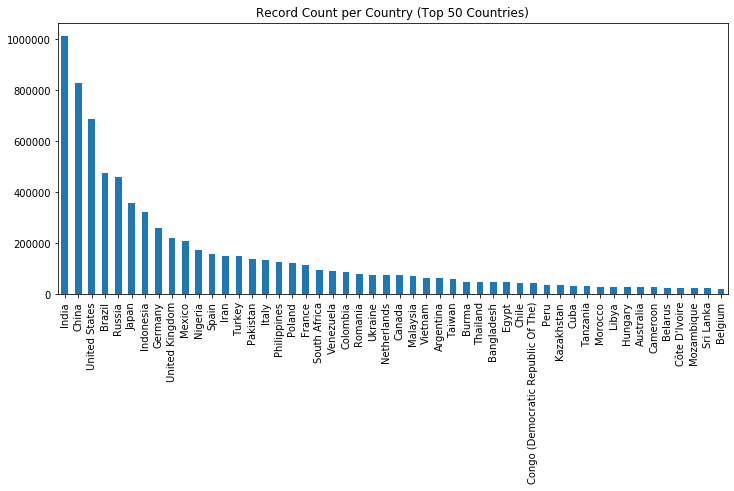

In [159]:
# Records per Country
RecordsPerCountry = df['Country'].value_counts()
RecordsPerCountry[:50].plot.bar(figsize=(12,5), title="Record Count per Country (Top 50 Countries)")


### Examine Data Distribution

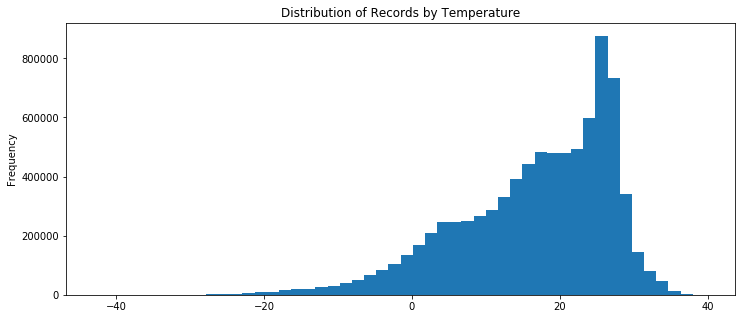

In [160]:
# Temperature Distribution
df['AverageTemperature'].plot(kind='hist', bins=50, figsize=(12, 5), title="Distribution of Records by Temperature")

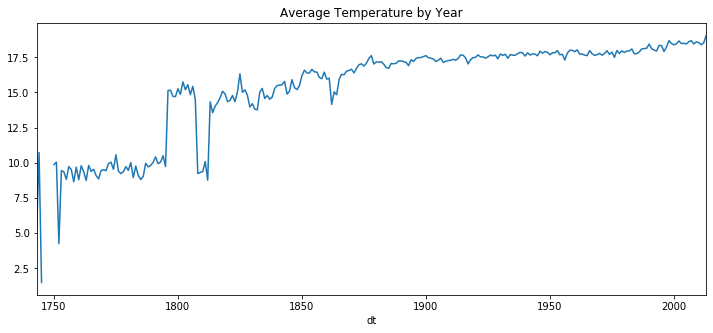

In [161]:
# Average Temperature by Year
MeanTempByYear = df.groupby(df['dt'].dt.year)['AverageTemperature'].mean()
MeanTempByYear.plot.line(figsize=(12,5), title="Average Temperature by Year")


### Examine Missing Data

In [162]:
# Identify NaN records
df.isna().sum()


dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

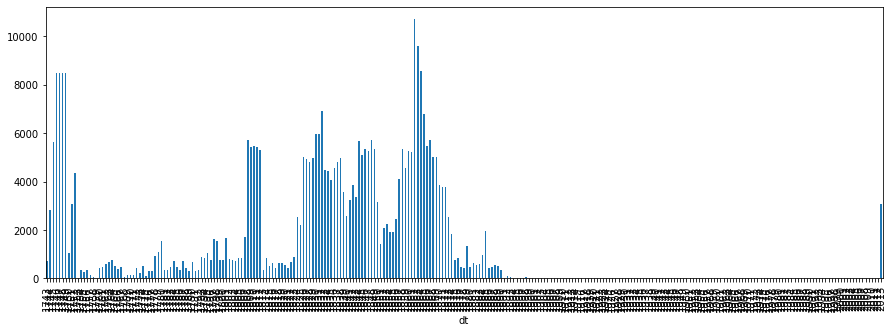

In [173]:
# Analyse NaN records
MissingTempData = df.isna().groupby(df['dt'].dt.year)['AverageTemperature'].sum()
MissingTempData.plot.bar(figsize=(15,5))


### Examine Outliers

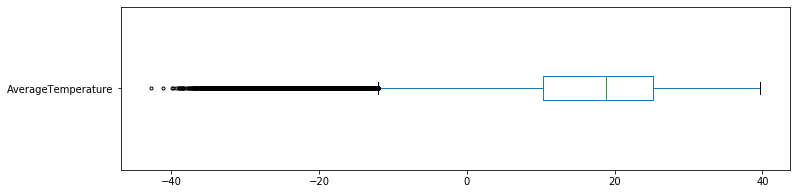

In [119]:
df['AverageTemperature'].plot.box(vert=False, figsize=(12,3), sym='.')


In [127]:
Q1, median, Q3 = df['AverageTemperature'].quantile(0.25), df['AverageTemperature'].quantile(0.5), df['AverageTemperature'].quantile(0.75)
IQR = Q3 - Q1

print('Temperature Quartiles: Q1 {}, Median {}, Q3 {}'.format(Q1, median, Q3))
print('Flier Thresholds: Min {}, Max {}'.format((Q1 - 1.5 * IQR), (Q3 + 1.5 * IQR)))


Temperature Quartiles: Q1 10.299, Median 18.831, Q3 25.21
Flier Thresholds: Min -12.067500000000003, Max 47.5765
